In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import pymysql

In [2]:
timeout = 10
connection = pymysql.connect(
      charset="utf8mb4",
      connect_timeout=timeout,
      cursorclass=pymysql.cursors.DictCursor,
      db="WEATHER-AIR-POLLUTION",
      host="mysql-3cafd5ec-weather-air-pollution.e.aivencloud.com",
      password="***********************",
      read_timeout=timeout,
      port=24379,
      user="avnadmin",
      write_timeout=timeout
)

In [2]:
# cur = connection.cursor()
# cur.execute("""SELECT * FROM Weather_Air_Cleaned""")
# df = pd.DataFrame(cur.fetchall())
df= pd.read_csv("Weather_Air_Cleaned.csv")
df["date_time"] = pd.to_datetime(df["date_time"])
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0


In [3]:
df["month"] = df["date_time"].dt.month
def get_season(month):
    _sea = {12: "Winter", 1: "Winter", 2: "Winter",
            3: "Spring", 4: "Spring", 5: "Spring",
            6: "Summer", 7: "Summer", 8: "Summer",
            9: "Autumn", 10: "Autumn", 11: "Autumn"}
    return _sea.get(month)
df["season"] = df["month"].map(get_season)
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,month,season
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0,1,Winter
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0,1,Winter
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0,1,Winter
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0,1,Winter
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0,9,Autumn
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0,9,Autumn
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0,9,Autumn
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0,9,Autumn


In [4]:
spring = df.loc[df["season"] == "Spring", "pm2_5"]
summer = df.loc[df["season"] == "Summer", "pm2_5"]
autumn = df.loc[df["season"] == "Autumn", "pm2_5"]
winter = df.loc[df["season"] == "Winter", "pm2_5"]

val = stats.f_oneway(spring, summer, autumn, winter)
print(val)

F_onewayResult(statistic=103.0643081582403, pvalue=2.2803125307658148e-61)


In [5]:
df['is_winter'] = (df['season'] == 'Winter').astype(int)
df['is_spring'] = (df['season'] == 'Spring').astype(int)
df['is_summer'] = (df['season'] == 'Summer').astype(int)
df['is_autumn'] = (df['season'] == 'Autumn').astype(int)
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,month,season,is_winter,is_spring,is_summer,is_autumn
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0,1,Winter,1,0,0,0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0,1,Winter,1,0,0,0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0,1,Winter,1,0,0,0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0,1,Winter,1,0,0,0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0,1,Winter,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0,9,Autumn,0,0,0,1
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0,9,Autumn,0,0,0,1
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0,9,Autumn,0,0,0,1
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0,9,Autumn,0,0,0,1


In [6]:
df.drop(columns=["date_time", "month", "season"], inplace=True)
df

,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,is_winter,is_spring,is_summer,is_autumn
0,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0,1,0,0,0
1,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0,1,0,0,0
2,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0,1,0,0,0
3,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0,1,0,0,0
4,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0,0,0,0,1
1724,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0,0,0,0,1
1725,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0,0,0,0,1
1726,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0,0,0,0,1


In [7]:
from sklearn.model_selection import train_test_split
target = "pm2_5"
x = df.drop(columns=[target])
y = df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)

y_predict = reg.predict(x_test)

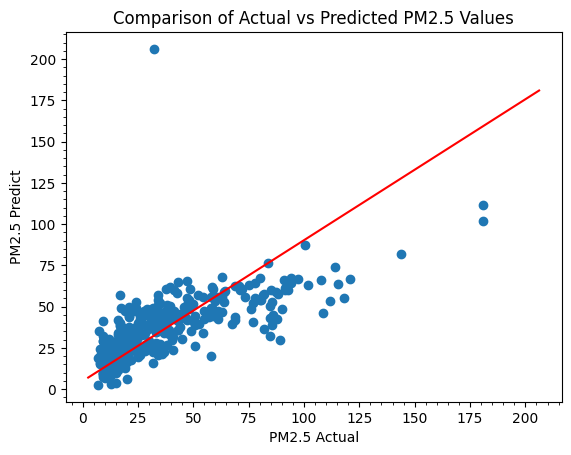

In [10]:
plt.scatter(y_test, y_predict)
plt.plot([min(y_predict), max(y_predict)], [min(y_test), max(y_test)], color="red")
plt.xlabel('PM2.5 Actual')
plt.ylabel('PM2.5 Predict')
plt.title("Comparison of Actual vs Predicted PM2.5 Values")
plt.minorticks_on()
plt.show()

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 13.669101382982653
MSE: 427.4614510810254
R2: 0.4728124727537065


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('KNN Score:', model.score(x_test, y_test))
print('KNN MAE:', mean_absolute_error(y_test, y_pred))
print('KNN MSE:', mean_squared_error(y_test, y_pred))

KNN Score: 0.6463165756498109
KNN MAE: 11.072766531167565
KNN MSE: 286.77846493398965


In [47]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import RANSACRegressor

# Giả sử X và y là dữ liệu đầu vào của bạn
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List các mô hình để thử
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Bayesian Ridge": BayesianRidge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "MLP (ANN)": MLPRegressor(),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1),
    "CatBoost": cb.CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6),
    "RANSAC": RANSACRegressor()
}

# Dự đoán và đánh giá các mô hình
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    score = model.score(x_test, y_test)  # R^2 score
    
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R^2 Score": score
    }

# In kết quả
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MAE: {metrics['MAE']}")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R^2 Score: {metrics['R^2 Score']}")
    print("-" * 50)


c:\Users\DO TUAN MINH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 1382, number of used features: 15
[LightGBM] [Info] Start training from score 35.971797
0:	learn: 25.6864691	total: 1.28ms	remaining: 127ms
1:	learn: 24.7515346	total: 2.41ms	remaining: 118ms
2:	learn: 23.7926938	total: 3.39ms	remaining: 110ms
3:	learn: 22.9527118	total: 4.49ms	remaining: 108ms
4:	learn: 22.2540079	total: 5.65ms	remaining: 107ms
5:	learn: 21.7175014	total: 6.69ms	remaining: 105ms
6:	learn: 21.1045682	total: 7.85ms	remaining: 104ms
7:	learn: 20.5667641	total: 9.12ms	remaining: 105ms
8:	learn: 20.0969287	total: 10.4ms	remaining: 105ms
9:	learn: 19.6966257	total: 11.5ms	remaining: 103ms
10:	learn: 19.3574862	total: 12.5ms	remaining: 101ms
11:	learn: 19.0026692	total: 13.7ms	remaining: 100ms
12:	learn: 18.6589311	total: 15m

In [49]:
df

,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,is_winter,is_spring,is_summer,is_autumn
0,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.000000,8.0,4.0,2.0,1,0,0,0
1,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.000000,9.0,4.0,4.0,1,0,0,0
2,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.000000,17.0,4.0,10.0,1,0,0,0
3,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.000000,23.0,4.0,11.0,1,0,0,0
4,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.000000,20.0,4.0,8.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.024544,19.0,38.0,3.0,0,0,0,1
1724,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.045311,19.0,39.0,3.0,0,0,0,1
1725,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.022656,19.0,39.0,3.0,0,0,0,1
1726,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.022656,19.0,37.0,3.0,0,0,0,1


In [50]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

# LightGBM model
model = lgb.LGBMRegressor()

# Định nghĩa các tham số tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 5, 10],
    'min_data_in_leaf': [20, 50, 100]
}

# GridSearchCV để tìm bộ tham số tối ưu
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# In kết quả tìm được
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Đánh giá mô hình với các tham số tốt nhất
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print("Final MSE: ", mean_squared_error(y_test, y_pred))


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 1382, number of used features: 15
[LightGBM] [Info] Start training from score 35.971797
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [98]:
model = lgb.LGBMRegressor(n_estimators=47, learning_rate=0.1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("R² score:", model.score(x_test, y_test))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 1382, number of used features: 15
[LightGBM] [Info] Start training from score 35.971797
R² score: 0.648212816741069
MAE: 10.782104089012373
MSE: 285.24092861801773


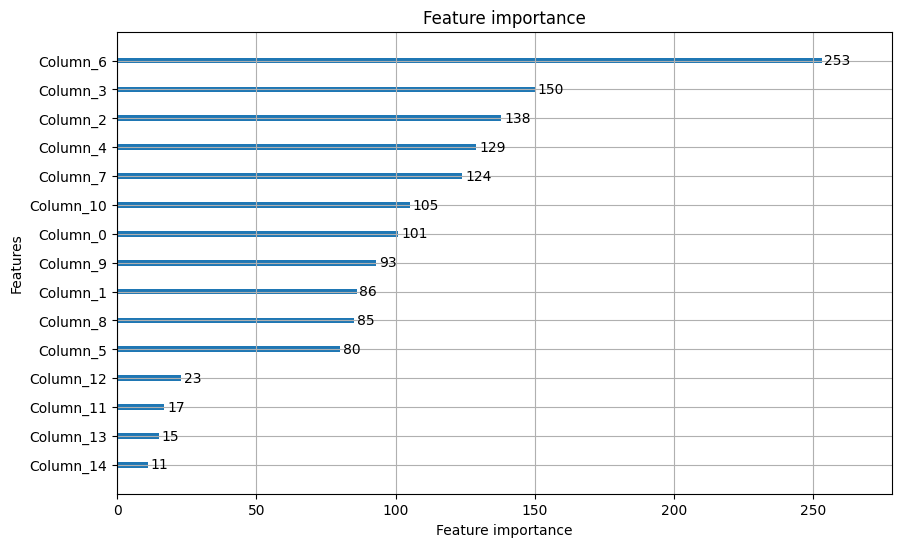

In [76]:
import matplotlib.pyplot as plt

# Visualize feature importance
lgb.plot_importance(model, max_num_features=15, importance_type='split', figsize=(10, 6))
plt.show()


In [79]:
import pandas as pd

# Lấy feature importance từ model
feature_importance = model.booster_.feature_importance(importance_type='split')
features = x.columns  # Tên các cột đặc trưng của bạn

# Tạo dataframe để hiển thị đặc trưng và điểm importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sắp xếp theo mức độ importance giảm dần
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# In kết quả
print(importance_df)


           Feature  Importance
6             pm10         253
3         wind_kph         150
2           temp_c         138
4      pressure_in         129
7               o3         124
10              co         105
0   totalprecip_mm         101
9              so2          93
1        avgvis_km          86
8              no2          85
5         humidity          80
12       is_spring          23
11       is_winter          17
13       is_summer          15
14       is_autumn          11


In [99]:
top_features = importance_df['Feature'][:10].to_list()
x_top= x[top_features]
x_train_selected, x_test_selected, y_train, y_test = train_test_split(x_top, y, test_size=0.2, random_state=42)

model = lgb.LGBMRegressor()
model.fit(x_train_selected, y_train)
y_pred = model.predict(x_test_selected)

print("R² score:", model.score(x_test_selected, y_test))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 1382, number of used features: 10
[LightGBM] [Info] Start training from score 35.971797
R² score: 0.6320762982002495
MAE: 11.222569958121563
MSE: 298.32496280768106


In [100]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
# Define the base models (Lasso, GradientBoosting, RandomForest)
base_learners = [
    ('lasso', Lasso(alpha=0.01)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

# Define the meta-model (could be a simple linear regressor)
meta_model = Lasso(alpha=0.01)

# Create the Stacking Regressor
stacked_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

# Train the Stacked model
stacked_model.fit(x_train, y_train)

# Make predictions
y_pred = stacked_model.predict(x_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print results
print("Stacked Model Performance:")
print(f"R² score: {r2}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

Stacked Model Performance:
R² score: 0.6080375298973242
RMSE: 17.827406092206154
MAE: 11.442224622179383


c:\Users\DO TUAN MINH\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
